1.	Create a new empty Jupyter Notebook.

2.	Import all the modules required for:
◦ numpy
◦ pandas
◦ matplotlib
◦ seaborn
◦ LinearRegression

In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [13]:
import warnings
warnings.filterwarnings('ignore')

3.	Read the height_mass.csv file into a Pandas DataSet called: people ◦ Use the pandas read_csv method.

In [10]:
people = pd.read_csv('data/height_mass.csv')
people

,Height (m),Mass (kg)
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


4.	Use a Seaborn histplot to show the distribution for Mass.
◦ https://seaborn.pydata.org/generated/seaborn.histplot.html 
◦ Experiment with different bin #’s and find which one gives you the clearest information about the data.
◦ What does the plot tell you about the data? Be specific. Don’t focus on the numbers as much as the visual attributes.
◦ Insert a markdown cell and note your observations. Superficial answers will lose marks.


<Axes: xlabel='Mass (kg)', ylabel='Count'>

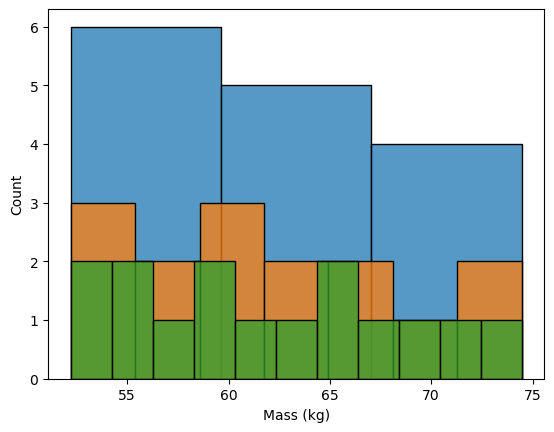

In [38]:
sb.histplot(people, x='Mass (kg)', bins=3)
sb.histplot(people, x='Mass (kg)', bins=7)
sb.histplot(people, x='Mass (kg)', bins=11)

5.	Use a Seaborn histplot to show the distribution for Height.
◦ Experiment with different bin #’s and find which one gives you the clearest information about the data.
◦ What does the plot tell you about the data? Be specific. Don’t focus on the numbers as much as the visual attributes.
◦ Insert a markdown cell and note your observations. Superficial answers will lose marks.


<Axes: xlabel='Height (m)', ylabel='Count'>

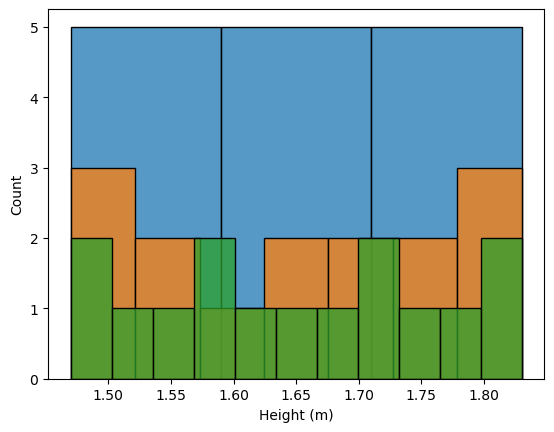

In [39]:
sb.histplot(people, x='Height (m)', bins=3)
sb.histplot(people, x='Height (m)', bins=7)
sb.histplot(people, x='Height (m)', bins=11)

6.	Use a Seaborn jointplot to plot x=Height, y=Mass ◦ If you get warnings, use named arguments like:
▪ jointplot(x=”x axis column name”, y=”y axis column name”) ◦ Does this plot confirm what the histplot showed?
◦ Insert a markdown cell and note your observations. Superficial answers will lose marks.


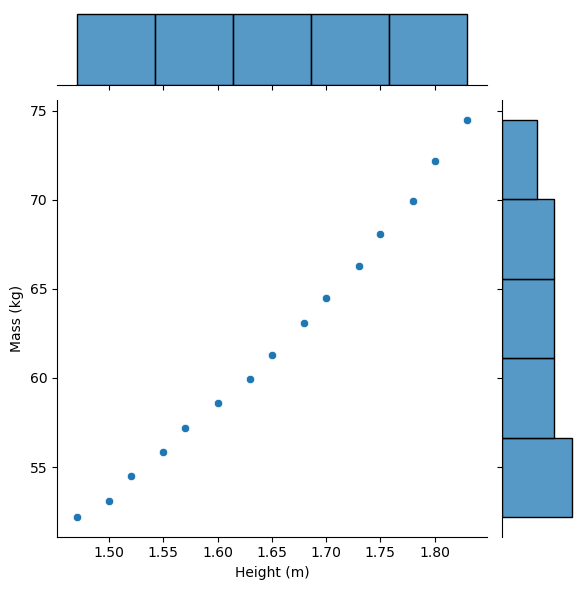

In [40]:
sb.jointplot(people, x='Height (m)', y='Mass (kg)')

7.	Split the data into training and testing data, using appropriate variable names.
◦ Prepare your x and y:
▪ x: Drop the Mass column.
▪ y: Specify the Mass column.
◦ Use sklearn train_test_split to split the data.


In [58]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(people.drop('Mass (kg)', axis = 1),
                                                people[['Mass (kg)']],
                                                test_size = 0.3)

8.	Create the model and fit it to the training data. ◦ Create a sklearn LinearRegression model.
◦ Use the fit method to fit it to the training data.


In [49]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

9.	Predict values based on testing data.
◦ Use the predict method to predict values with the x testing data.


In [52]:
predictions = lm.predict(x_test)
predictions

array([[66.8899114 ],
       [60.88912571],
       [63.88951856],
       [68.09006854],
       [72.89069709]])

10. Print out error metrics:
◦ Mean Absolute Error (MAE)
◦ Mean Squared Error (MSE)
◦ Root Mean Squared Error (RMSE)


In [56]:
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 0.7855580073553952
MSE 0.8724746954537871
RMSE 0.9340635393022185


11. Predict some specific mass. Choose any height directly from the data, predict the weight for that height, and see whether the prediction is close to reality.
◦ Use the predict method and feed it a 2d array like: [[1.70]]
◦ Add a markdown cell and explain how well the prediction matched reality, with specific attention to the RMSE error. Be specific and compare the numbers. Superficial answers will lose marks.


In [59]:
lm.predict([[1.73]])

array([[66.8899114]])

	Height (m)	Mass (kg)
	1.73	        66.28

 Predicted value: 66.89

 The linear regression model predicted a really good value for this height, with an error of only 0.61.
 
 This is a realistic prediction given that the RMSE is 0.93, which indicates that given a normal distribution of the observed values, 68% of the predictions is within 1 RMSE (+/-0.93) of the actual value; which is true since the predicted value of 66.89 is between 66.28-0.93 and 66.28+0.93.

12. Use seaborn to display an lmplot with the linear regression line shown (fit_reg=True).
◦ If you get warnings, use named arguments like:
▪ lmplot(x=”x axis column name”, y=”y axis column name”) ◦ Does this plot support your observations from task #6?
◦ Insert a markdown cell and note your observations. Superficial answers will lose marks.

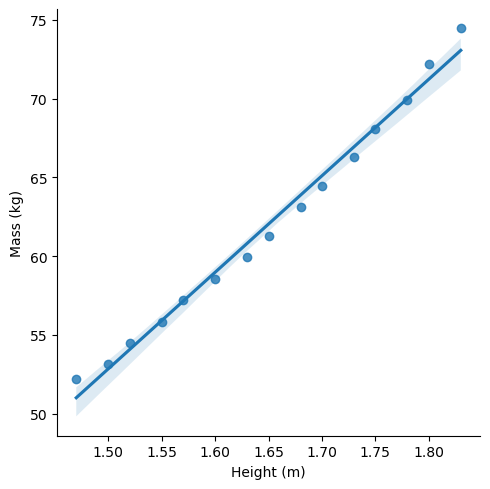

In [60]:
sb.lmplot(people, x='Height (m)', y='Mass (kg)', fit_reg=True)